<a href="https://colab.research.google.com/github/shubhamsartape/Play-Store-App-Review-Analysis---Capstone-Project/blob/main/Shubham_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Importing lib/Modules, reading data Files into DataFrame

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns

from ast import literal_eval as le

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/MyDrive/AlmaBetter/Python/'
data = pd.read_csv(working_directory + 'Play Store Data.csv')
reviews = pd.read_csv(working_directory + 'User Reviews.csv')

# Play Store data wrangling

In [ ]:
data.shape

(10841, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
data.rename(columns={'Content Rating' : 'Content_Rating','Last Updated' : 'Last_Updated','Current Ver' : 'Current_Ver','Android Ver' : 'Android_Ver'},inplace=True)

In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

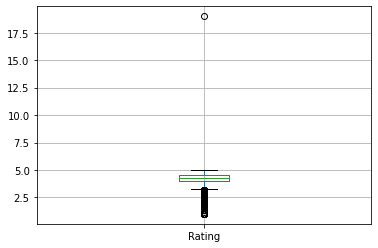

In [ ]:
data.boxplot()

## Fixing 'Rating'

In [ ]:
data[data.Rating>5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
data.drop([10472],inplace=True)
data[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [ ]:
px.box(data,y="Rating")

In [ ]:
px.histogram(data, x = 'Rating', y = 'Rating' )

##Cleaning 'Install'

> Checking data in installs - value_counts()




1.   Remove + sign
2.   Remove ',' sign
1.   Convert series to numerical value (int/Float)








In [ ]:
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [ ]:
data['Installs'] = data['Installs'].apply(lambda x : str(x).replace('+',''))
data['Installs'] = data['Installs'].apply(lambda x : str(x).replace(',',''))
data['Installs'] = pd.to_numeric(data['Installs'])
data['Installs'].dtype

dtype('int64')

In [ ]:
data['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

##Filling NA Value in 'Ratings' with mode value.

In [ ]:
data['Rating'].fillna(data['Rating'].mode().values[0],inplace=True)
data['Rating'] = np.where(data['Installs']==0 , 0 ,data['Rating'])
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data[data['Installs']==0]['Rating']

4465    0.0
5307    0.0
5486    0.0
5945    0.0
6692    0.0
7434    0.0
8081    0.0
8614    0.0
8871    0.0
9148    0.0
9337    0.0
9719    0.0
9905    0.0
9917    0.0
9934    0.0
Name: Rating, dtype: float64

In [ ]:
data['Rating'].isnull().sum()

0

In [ ]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       2
dtype: int64

##Checking and fixing 'null' value in 'Type'


*   A quick check from play store tell us the app is 'Free' type

In [ ]:
data[data.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
9148,Command & Conquer: Rivals,FAMILY,0.0,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
data['Type'].fillna("Free", inplace = True)

## Checking overall null values in data

In [ ]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       2
dtype: int64

##Fixing NA value in 'Type', 'Current_Ver', 'Android_Ver' with mode()0

In [ ]:
data['Type'].fillna(str(data['Type'].mode().values[0]),inplace=True)
data['Current_Ver'].fillna(str(data['Current_Ver'].mode().values[0]),inplace=True)
data['Android_Ver'].fillna(str(data['Android_Ver'].mode().values[0]),inplace=True)

In [ ]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [ ]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##Cleaning 'Price'

1.   Remove '$' currency symbol
2.   Converting series to numerical value (int/float)





In [ ]:
data['Price'] = data['Price'].apply(lambda x : str(x).replace('$',''))
data['Price'] = pd.to_numeric(data['Price'])
data['Price'].dtype

dtype('float64')

##Cleaning 'Size' :


> size analysis - value_counts()


1. Replace 'Varies with...' with np.NaN
2. Replace 'M' to e+6 or 000000
3. Replace 'K' to e+3 or 000
4. Remove '+' 
5. remove ',' 
6. Convert all Sizes to numeric value

In [ ]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [ ]:
data['Size'] = data.Size.replace("Varies with device",np.nan)
data['Size'] = data.Size.str.replace("M","e+6")
data['Size'] = data.Size.str.replace("k","e+3")
data['Size'] = data.Size.replace("1,000+",1000)
data['Size'] = pd.to_numeric(data['Size'])
data['Size'].dtype

dtype('float64')

In [ ]:
data['Size'].value_counts()

11000000.0    198
12000000.0    196
14000000.0    194
13000000.0    191
15000000.0    184
             ... 
430000.0        1
429000.0        1
200000.0        1
460000.0        1
619000.0        1
Name: Size, Length: 459, dtype: int64

##Dropping rows with Duplicate APP data

In [ ]:
data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [ ]:
data.App.count()

10840

In [ ]:
data = data.drop_duplicates(subset='App', keep="first")

In [ ]:
data.App.count()

9659

In [ ]:
data['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9659, dtype: int64

##Fixing 'Reviews' data type

In [ ]:
type(data.Reviews[1000])

str

In [ ]:
data['Reviews'] = pd.to_numeric(data['Reviews'])

In [ ]:
type(data.Reviews[1000])

numpy.int64

##Fixing 'Genres' by spliting at ';' and converting into list

In [ ]:
data['Genres']

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 9659, dtype: object

In [ ]:
data['Genres'] = data['Genres'].apply(lambda x : list(x.split(';')))

In [ ]:
data['Genres']

0                      [Art & Design]
1        [Art & Design, Pretend Play]
2                      [Art & Design]
3                      [Art & Design]
4          [Art & Design, Creativity]
                     ...             
10836                     [Education]
10837                     [Education]
10838                       [Medical]
10839             [Books & Reference]
10840                     [Lifestyle]
Name: Genres, Length: 9659, dtype: object